In [14]:
!conda install -c roebel mido

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - mido

Current channels:

  - https://conda.anaconda.org/roebel/win-64
  - https://conda.anaconda.org/roebel/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [6]:
!python -V

Python 3.9.16


In [12]:
!pip install mido

     -------------------------------------- 51.1/51.1 kB 869.2 kB/s eta 0:00:00


#

In [324]:
import mido
import json
import copy
import random


Перевод MIDI в JSON.
# длительности на данный момент постоянные

In [325]:
def mid_to_json(mid):
    temp=[]
    new_data={'res':{}}
    new_data.get('res')['notes']=[]
    for i in mid.tracks[0]:
        if i.type=='note_on':
            new_data.get('res')['notes'].append({'on':i.note})
        elif i.type=='sysex':
            new_data.get('res')['notes'].append({'sysex':i.time}) 
        elif i.type=='note_off':
            new_data.get('res')['notes'].append({'off':i.note})
    return(new_data)

In [322]:
def mid_to_json2(mid):
    temp=[]
    new_data={'res':{}}
    new_data.get('res')['notes']=[]
    notes_time=[]
    for i in mid.tracks[0]:
        if i.type=='note_on':
            if i.note not in [j[0] for j in notes_time]:
                notes_time.append([i.note,0])
        elif i.type=='sysex':
            for j in range(len(notes_time)):
                notes_time[j][1]=notes_time[j][1]+i.time
        elif i.type=='note_off':
            for j in range(len(notes_time)):
                if notes_time[j][0] == i.note:
                    if notes_time[j][1]:
                        for k in range(len(notes_time)):
                            if k!=j:
                                notes_time[k][1]=notes_time[k][1]-notes_time[j][1]
                        new_data.get('res')['notes'].append(notes_time.pop(j))
                    else:
                        a=new_data.get('res')['notes'][-1][0]
                        if type(new_data.get('res')['notes'][-1][0])==int:
                            a=[new_data.get('res')['notes'][-1][0]].copy()
                        new_data.get('res')['notes'][-1][0] = a.append(notes_time.pop(j)[0])
                    break
        print(notes_time)
    return(new_data)

Входной JSON: notes - ноты, chords - аккорды, emotion - настроение

In [176]:
json_string = """
{
    "res": {
        "notes": [
            [60,500],
            [60,500],
            [67,500],
            [67,500],
            [69,500],
            [69,500],
            [67,1000],
            [65,500],
            [65,500],
            [64,500],
            [64,500],
            [62,500],
            [62,500],
            [60,500]
        ],
        "chords": [
            [[36,40,43,47],500],
            [[38,42,45,49],500]
        ],
        "emotion": "scary"
    }
}
"""
 
data = json.loads(json_string)

In [327]:
json_string = """
{
    "res": {
        "notes": [
            {"on": 60},
            {"sysex": 500},
            {"off": 60},
            {"on": 60},
            {"sysex": 500},
            {"off": 60},
            {"on": 67},
            {"sysex": 500},
            {"off": 67},
            {"on": 67},
            {"sysex": 500},
            {"off": 67},
            {"on": 69},
            {"sysex": 500},
            {"off": 69},
            {"on": 69},
            {"sysex": 500},
            {"off": 69},
            {"on": 67},
            {"sysex": 1000},
            {"off": 67},
            {"on": 65},
            {"sysex": 500},
            {"off": 65},
            {"on": 65},
            {"sysex": 500},
            {"off": 65},
            {"on": 64},
            {"sysex": 500},
            {"off": 64},
            {"on": 64},
            {"sysex": 500},
            {"off": 64},
            {"on": 62},
            {"sysex": 500},
            {"off": 62},
            {"on": 62},
            {"sysex": 500},
            {"off": 62},
            {"on": 60},
            {"sysex": 500},
            {"off": 60}
        ],
        "chords": [
            {"on": 36},
            {"on": 40},
            {"on": 43},
            {"on": 47},
            {"sysex": 500},
            {"off": 36},
            {"off": 40},
            {"off": 43},
            {"off": 47},
            {"on": 38},
            {"on": 42},
            {"on": 45},
            {"on": 49},
            {"sysex": 500},
            {"off": 38},
            {"off": 42},
            {"off": 45},
            {"off": 49}
        ],
        "emotion": "scary"
    }
}
"""
 
data2 = json.loads(json_string)

In [328]:
data.get('res').get('notes')

[[60, 500],
 [60, 500],
 [67, 500],
 [67, 500],
 [69, 500],
 [69, 500],
 [67, 1000],
 [65, 500],
 [65, 500],
 [64, 500],
 [64, 500],
 [62, 500],
 [62, 500],
 [60, 500]]

In [329]:
data2.get('res').get('notes')

[{'on': 60},
 {'sysex': 500},
 {'off': 60},
 {'on': 60},
 {'sysex': 500},
 {'off': 60},
 {'on': 67},
 {'sysex': 500},
 {'off': 67},
 {'on': 67},
 {'sysex': 500},
 {'off': 67},
 {'on': 69},
 {'sysex': 500},
 {'off': 69},
 {'on': 69},
 {'sysex': 500},
 {'off': 69},
 {'on': 67},
 {'sysex': 1000},
 {'off': 67},
 {'on': 65},
 {'sysex': 500},
 {'off': 65},
 {'on': 65},
 {'sysex': 500},
 {'off': 65},
 {'on': 64},
 {'sysex': 500},
 {'off': 64},
 {'on': 64},
 {'sysex': 500},
 {'off': 64},
 {'on': 62},
 {'sysex': 500},
 {'off': 62},
 {'on': 62},
 {'sysex': 500},
 {'off': 62},
 {'on': 60},
 {'sysex': 500},
 {'off': 60}]

Для того чтобы ноты не отжимались мгновенно, нужно задать time (в случае нажимания и отпускания нескольких клавиш одновременно, мы применяли системное сообщение с параметром time между циклами из нажатия и отпускания клавиш)

In [330]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

track.append(mido.Message('program_change', program=12, time=0))
j=-1
for i in data2.get('res').get('notes'):
    if i.get('on'):
        track.append(mido.Message('note_on', note=i.get('on')))
    if i.get('sysex'):
        track.append(mido.Message('sysex', time=i.get('sysex')))
    if i.get('off'):
        track.append(mido.Message('note_off', note=i.get('off')))

mid.save('new_song.mid')
mid_to_json2(mid)

[]
[[60, 0]]
[[60, 500]]
[]
[[60, 0]]
[[60, 500]]
[]
[[67, 0]]
[[67, 500]]
[]
[[67, 0]]
[[67, 500]]
[]
[[69, 0]]
[[69, 500]]
[]
[[69, 0]]
[[69, 500]]
[]
[[67, 0]]
[[67, 1000]]
[]
[[65, 0]]
[[65, 500]]
[]
[[65, 0]]
[[65, 500]]
[]
[[64, 0]]
[[64, 500]]
[]
[[64, 0]]
[[64, 500]]
[]
[[62, 0]]
[[62, 500]]
[]
[[62, 0]]
[[62, 500]]
[]
[[60, 0]]
[[60, 500]]
[]


{'res': {'notes': [[60, 500],
   [60, 500],
   [67, 500],
   [67, 500],
   [69, 500],
   [69, 500],
   [67, 1000],
   [65, 500],
   [65, 500],
   [64, 500],
   [64, 500],
   [62, 500],
   [62, 500],
   [60, 500]]}}

In [331]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

track.append(mido.Message('program_change', program=12, time=0))
j=-1
for i in data.get('res').get('notes'):
    track.append(mido.Message('note_on', note=i[0]))
    track.append(mido.Message('sysex', time=i[1]))
    track.append(mido.Message('note_off', note=i[0]))

mid.save('new_song.mid')
mid_to_json(mid)

{'res': {'notes': [{'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 67},
   {'sysex': 500},
   {'off': 67},
   {'on': 67},
   {'sysex': 500},
   {'off': 67},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 67},
   {'sysex': 1000},
   {'off': 67},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 64},
   {'sysex': 500},
   {'off': 64},
   {'on': 64},
   {'sysex': 500},
   {'off': 64},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on': 60},
   {'sysex': 500},
   {'off': 60}]}}

эмпирически time - длительность, velocity - громкость

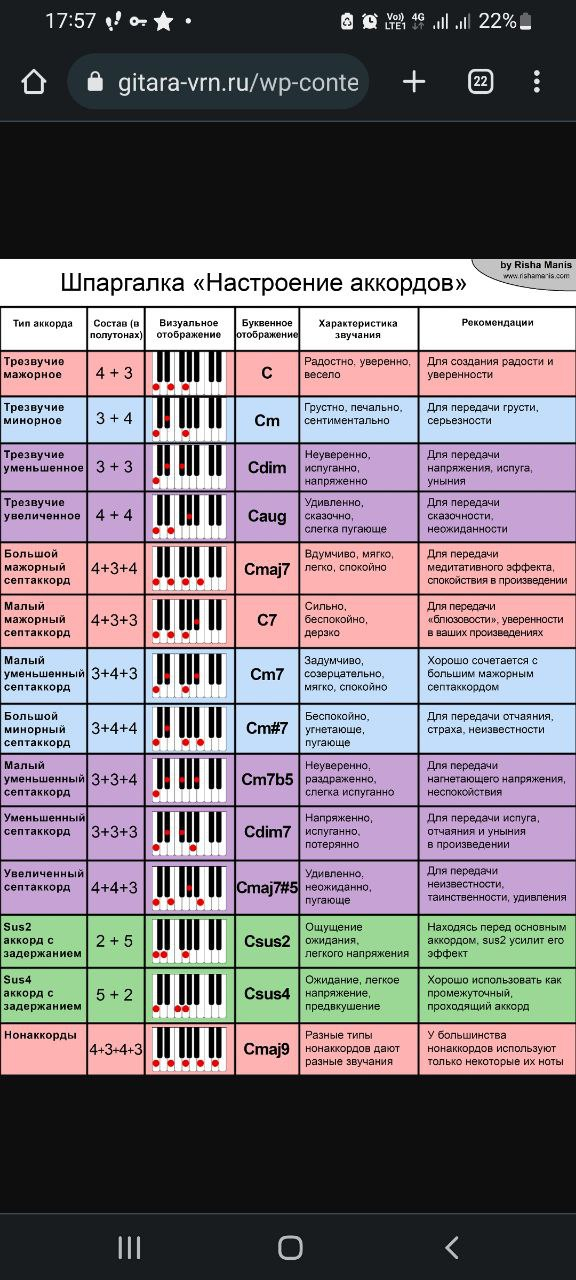

# описан только случай когда тоника является самой низкой нотой (т.е. C-E-G и G-C-E оба являются До-мажором, но в списке указан только первый вариант)

In [332]:
major=[] #радостно, уверенно, весело
minor=[] #грустно, печально, сентиментально
dim=[] #неуверенно, испуганно, напряжённо
aug=[] #удивленно, сказочно, слегка пугающе
major7=[] #вдумчиво, мягко, легко, спокойно
chord7=[] #сильно, беспокойно, дерзко
minor7=[] #задумчиво, созерцательно, мягко, спокойно
minorsharp7=[] #беспокойно, угнетающе, пугающе
minor7b5=[] #неуверенно, раздражённо, слегка испуганно
dim7=[] #напряженно, испуганно, потерянно
major7sharp5=[] #удивленно, неожиданно, пугающе
sus2=[] #ощущение ожидания, легкого напряжения
sus4=[] #ожидание, легкое напряжение, предвкушение
for i in range(0,127-4-3-4):
    major.append([i, i+4, i+4+3])
    minor.append([i, i+3, i+3+4])
    dim.append([i, i+3, i+3+3])
    aug.append([i, i+4, i+4+4])
    major7.append([i, i+4, i+4+3, i+4+3+4])
    chord7.append([i, i+4, i+4+3, i+4+3+3])
    minor7.append([i, i+3, i+3+4, i+3+4+3])
    minorsharp7.append([i, i+3, i+3+4, i+3+4+4])
    minor7b5.append([i, i+3, i+3+3, i+3+3+4])
    dim7.append([i, i+3, i+3+3, i+3+3+3])
    major7sharp5.append([i, i+4, i+4+4, i+4+4+3])
    sus2.append([i, i+2, i+2+5])
    sus4.append([i, i+5, i+5+2])

In [333]:
major[0]

[0, 4, 7]

In [334]:
def get_chord_by_emotion(emotion):
    switch_case = {
        "joy": major,
        "sad": minor,
        "scared": random.choice([dim,dim7]),
        "surprise": random.choice([aug,major7sharp5]),
        "calm": random.choice([major7,minor7]),
        "scary": minorsharp7,
        "angry": minor7b5,
        "suspense": random.choice([sus2,sus4,chord7])
    }
    if emotion in switch_case:
        return switch_case[emotion]
    else:
        return major7

Полученные на вход ноты преобразуются в аккорды

In [344]:
for i in data2.get('res').get('notes'):
    print(i)

{'on': 60}
{'sysex': 500}
{'off': 60}
{'on': 60}
{'sysex': 500}
{'off': 60}
{'on': 67}
{'sysex': 500}
{'off': 67}
{'on': 67}
{'sysex': 500}
{'off': 67}
{'on': 69}
{'sysex': 500}
{'off': 69}
{'on': 69}
{'sysex': 500}
{'off': 69}
{'on': 67}
{'sysex': 1000}
{'off': 67}
{'on': 65}
{'sysex': 500}
{'off': 65}
{'on': 65}
{'sysex': 500}
{'off': 65}
{'on': 64}
{'sysex': 500}
{'off': 64}
{'on': 64}
{'sysex': 500}
{'off': 64}
{'on': 62}
{'sysex': 500}
{'off': 62}
{'on': 62}
{'sysex': 500}
{'off': 62}
{'on': 60}
{'sysex': 500}
{'off': 60}


In [345]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

chord = get_chord_by_emotion(data2.get('res').get('emotion'))
for i in data2.get('res').get('notes'):
    if i.get('on'):
        for j in chord[i.get('on')]:
            track.append(mido.Message('note_on', note=j))
    if i.get('sysex'):
        track.append(mido.Message('sysex', time=i.get('sysex')))
    if i.get('off'):
        for j in chord[i.get('off')]:
            track.append(mido.Message('note_off', note=j))

mid.save('new_song_chords.mid')
mid_to_json(mid)

{'res': {'notes': [{'on': 60},
   {'on': 63},
   {'on': 67},
   {'on': 71},
   {'sysex': 500},
   {'off': 60},
   {'off': 63},
   {'off': 67},
   {'off': 71},
   {'on': 60},
   {'on': 63},
   {'on': 67},
   {'on': 71},
   {'sysex': 500},
   {'off': 60},
   {'off': 63},
   {'off': 67},
   {'off': 71},
   {'on': 67},
   {'on': 70},
   {'on': 74},
   {'on': 78},
   {'sysex': 500},
   {'off': 67},
   {'off': 70},
   {'off': 74},
   {'off': 78},
   {'on': 67},
   {'on': 70},
   {'on': 74},
   {'on': 78},
   {'sysex': 500},
   {'off': 67},
   {'off': 70},
   {'off': 74},
   {'off': 78},
   {'on': 69},
   {'on': 72},
   {'on': 76},
   {'on': 80},
   {'sysex': 500},
   {'off': 69},
   {'off': 72},
   {'off': 76},
   {'off': 80},
   {'on': 69},
   {'on': 72},
   {'on': 76},
   {'on': 80},
   {'sysex': 500},
   {'off': 69},
   {'off': 72},
   {'off': 76},
   {'off': 80},
   {'on': 67},
   {'on': 70},
   {'on': 74},
   {'on': 78},
   {'sysex': 1000},
   {'off': 67},
   {'off': 70},
   {'off': 74}

Преобразование входных аккордов в MIDI и обратно

In [347]:
data2.get('res').get('chords')

[{'on': 36},
 {'on': 40},
 {'on': 43},
 {'on': 47},
 {'sysex': 500},
 {'off': 36},
 {'off': 40},
 {'off': 43},
 {'off': 47},
 {'on': 38},
 {'on': 42},
 {'on': 45},
 {'on': 49},
 {'sysex': 500},
 {'off': 38},
 {'off': 42},
 {'off': 45},
 {'off': 49}]

In [350]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

for i in data2.get('res').get('chords'):
    if i.get('on'):
        track.append(mido.Message('note_on', note=i.get('on')))
    if i.get('sysex'):
        track.append(mido.Message('sysex', time=i.get('sysex')))
    if i.get('off'):
        track.append(mido.Message('note_off', note=i.get('off')))

mid.save('USER_song_chords.mid')
mid_to_json(mid)

{'res': {'notes': [{'on': 36},
   {'on': 40},
   {'on': 43},
   {'on': 47},
   {'sysex': 500},
   {'off': 36},
   {'off': 40},
   {'off': 43},
   {'off': 47},
   {'on': 38},
   {'on': 42},
   {'on': 45},
   {'on': 49},
   {'sysex': 500},
   {'off': 38},
   {'off': 42},
   {'off': 45},
   {'off': 49}]}}

In [225]:
#new_data=copy.deepcopy(data)
#
#new_data.get('res')['new_chords']=[major[i[0]] for i in data.get('res').get('notes')]
#json.dumps(new_data)

'{"res": {"notes": [36, 36, 38, 38, 39, 39, 41, 39, 39, 38, 38, 36, 36, 34, 36, 36], "chords": [[36, 40, 43, 47], [38, 42, 45, 49]], "new_chords": [[36, 40, 43], [36, 40, 43], [38, 42, 45], [38, 42, 45], [39, 43, 46], [39, 43, 46], [41, 45, 48], [39, 43, 46], [39, 43, 46], [38, 42, 45], [38, 42, 45], [36, 40, 43], [36, 40, 43], [34, 38, 41], [36, 40, 43], [36, 40, 43]]}}'

I — IV — V — V.
I — I — IV — V.
I — IV — I — V.
I — IV — V — IV.

.
.
.

Блюзовая гармония

I — I — I — I
IV — IV — I — I
V — IV — I — I

C-C-C-C-F-F-C-C-G-F-C-C

i i i i i+5 i+5 i i i+7 i+5 i i

In [351]:
chord3_p=[0,5,7,7,0,0,5,7,0,5,0,7,0,5,7,5]
blues_p=[0,0,0,0,5,5,0,0,7,5,0,0]

Построение нотной прогрессии от одной ноты

In [352]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

for i in [76]:
    for j in chord3_p:
        track.append(mido.Message('note_on', note=i+j))
        track.append(mido.Message('note_off', note=i+j, time=240))

mid.save('new_song_progression.mid')
mid_to_json(mid)

{'res': {'notes': [{'on': 76},
   {'off': 76},
   {'on': 81},
   {'off': 81},
   {'on': 83},
   {'off': 83},
   {'on': 83},
   {'off': 83},
   {'on': 76},
   {'off': 76},
   {'on': 76},
   {'off': 76},
   {'on': 81},
   {'off': 81},
   {'on': 83},
   {'off': 83},
   {'on': 76},
   {'off': 76},
   {'on': 81},
   {'off': 81},
   {'on': 76},
   {'off': 76},
   {'on': 83},
   {'off': 83},
   {'on': 76},
   {'off': 76},
   {'on': 81},
   {'off': 81},
   {'on': 83},
   {'off': 83},
   {'on': 81},
   {'off': 81}]}}

Применение квинтового круга для определения наиболее созвучных аккордов

In [353]:
circle_of_fifths=[0]
for i in range(0, 11):
    circle_of_fifths.append((circle_of_fifths[-1]+7)%12)
print(circle_of_fifths)

[0, 7, 2, 9, 4, 11, 6, 1, 8, 3, 10, 5]


In [354]:
for i in range(0,len(circle_of_fifths)):
    print(circle_of_fifths[i-1],circle_of_fifths[i],circle_of_fifths[(i+1)%len(circle_of_fifths)])

5 0 7
0 7 2
7 2 9
2 9 4
9 4 11
4 11 6
11 6 1
6 1 8
1 8 3
8 3 10
3 10 5
10 5 0


In [355]:
print(major[circle_of_fifths[i-1]],major[circle_of_fifths[i]],major[circle_of_fifths[(i+1)%len(circle_of_fifths)]])
print(minor[circle_of_fifths[i-1-9]],minor[circle_of_fifths[i-9]],minor[circle_of_fifths[i+1-9]])

[10, 14, 17] [5, 9, 12] [0, 4, 7]
[7, 10, 14] [2, 5, 9] [9, 12, 16]


Перебор близких аккордов по одной ноте (тональности)

In [356]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

for i in [60]:
    for j in [major[circle_of_fifths[i%12-1]],major[circle_of_fifths[i%12]],major[circle_of_fifths[(i%12+1)%len(circle_of_fifths)]],
              minor[circle_of_fifths[i%12+1-9]],minor[circle_of_fifths[i%12-9]],minor[circle_of_fifths[i%12-1-9]]]:
        for k in j:
            track.append(mido.Message('note_on', note=i+k))
        track.append(mido.Message('sysex', time=480))
        for k in j:    
            track.append(mido.Message('note_off', note=i+k))

mid.save('new_circle_progression.mid')
mid_to_json(mid)

{'res': {'notes': [{'on': 65},
   {'on': 69},
   {'on': 72},
   {'sysex': 480},
   {'off': 65},
   {'off': 69},
   {'off': 72},
   {'on': 60},
   {'on': 64},
   {'on': 67},
   {'sysex': 480},
   {'off': 60},
   {'off': 64},
   {'off': 67},
   {'on': 67},
   {'on': 71},
   {'on': 74},
   {'sysex': 480},
   {'off': 67},
   {'off': 71},
   {'off': 74},
   {'on': 64},
   {'on': 67},
   {'on': 71},
   {'sysex': 480},
   {'off': 64},
   {'off': 67},
   {'off': 71},
   {'on': 69},
   {'on': 72},
   {'on': 76},
   {'sysex': 480},
   {'off': 69},
   {'off': 72},
   {'off': 76},
   {'on': 62},
   {'on': 65},
   {'on': 69},
   {'sysex': 480},
   {'off': 62},
   {'off': 65},
   {'off': 69}]}}

# тональность определяется первой нотой в данных пользователя, а количество нот мелодии до смены аккорда задано числом

In [372]:
#TODO
def get_min_length(notes):
    lens=[]
    for note in notes:
        if note.get('sysex'):
            lens.append(note.get('sysex'))
    return min(lens)

def get_melody_notes_per_chord(notes):
    return 4

In [375]:
def get_cycles(notes):
    min_length=get_min_length(notes)
    rhythm=get_melody_notes_per_chord(notes)
    cycle=[0]
    temp=0
    for i in range(len(notes)):
        if notes[i].get('sysex'):
            temp=temp+notes[i].get('sysex')
        if temp>=min_length*rhythm:
            cycle.append(i+1)
            temp=0
    if temp!=0:
        cycle.append(i+1)
    return cycle

In [406]:
def get_key(notes):
    for i in notes:
        if i.get('on'):
            break
    return i.get('on')

In [35]:
json_string = """
{
    "res": {
        "notes": [
            [60,500],
            [60,500],
            [67,500],
            [67,500],
            [69,500],
            [69,500],
            [67,1000],
            [65,500],
            [65,500],
            [64,500],
            [64,500],
            [62,500],
            [62,500],
            [60,500]
        ],
        "emotion": "suspense"
    }
}
"""
 
data = json.loads(json_string)

In [393]:
json_string = """
{
    "res": {
        "notes": [
            {"on": 60},
            {"sysex": 500},
            {"off": 60},
            {"on": 60},
            {"sysex": 500},
            {"off": 60},
            {"on": 67},
            {"sysex": 500},
            {"off": 67},
            {"on": 67},
            {"sysex": 500},
            {"off": 67},
            {"on": 69},
            {"sysex": 500},
            {"off": 69},
            {"on": 69},
            {"sysex": 500},
            {"off": 69},
            {"on": 67},
            {"sysex": 1000},
            {"off": 67},
            {"on": 65},
            {"sysex": 500},
            {"off": 65},
            {"on": 65},
            {"sysex": 500},
            {"off": 65},
            {"on": 64},
            {"sysex": 500},
            {"off": 64},
            {"on": 64},
            {"sysex": 500},
            {"off": 64},
            {"on": 62},
            {"sysex": 500},
            {"off": 62},
            {"on": 62},
            {"sysex": 500},
            {"off": 62},
            {"on": 60},
            {"sysex": 500},
            {"off": 60}
        ],
        "emotion": "suspense"
    }
}
"""
 
data = json.loads(json_string)

Построение аккордовой прогрессии по мелодии (аккордом берётся мажорный аккорд каждой 4-ой ноты мелодии)

In [407]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

notes = data.get('res').get('notes')
notes_cycle = get_melody_notes_per_chord(notes)
notes_cycle_len = get_cycles(notes)
print(notes_cycle_len)
chord=get_chord_by_emotion(data.get('res').get('emotion'))
for i in range(len(notes_cycle_len)-1):
    cycle_notes=notes[notes_cycle_len[i]:notes_cycle_len[i+1]]
    melody_key = get_key(cycle_notes)
    for k in chord[melody_key]:
        track.append(mido.Message('note_on', note=k-24))
    for j in cycle_notes:
        if j.get('on'):
            track.append(mido.Message('note_on', note=j.get('on')))
        if j.get('sysex'):
            track.append(mido.Message('sysex', time=j.get('sysex')))
        if j.get('off'):
            track.append(mido.Message('note_off', note=j.get('off')))
    for k in chord[melody_key]:
        track.append(mido.Message('note_off', note=k-24))

mid.save('new_accompany_melody_progression.mid')
mid_to_json(mid)

[0, 11, 20, 32, 42]


{'res': {'notes': [{'on': 36},
   {'on': 41},
   {'on': 43},
   {'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 67},
   {'sysex': 500},
   {'off': 67},
   {'on': 67},
   {'sysex': 500},
   {'off': 36},
   {'off': 41},
   {'off': 43},
   {'on': 45},
   {'on': 50},
   {'on': 52},
   {'off': 67},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 67},
   {'sysex': 1000},
   {'off': 45},
   {'off': 50},
   {'off': 52},
   {'on': 41},
   {'on': 46},
   {'on': 48},
   {'off': 67},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 64},
   {'sysex': 500},
   {'off': 64},
   {'on': 64},
   {'sysex': 500},
   {'off': 41},
   {'off': 46},
   {'off': 48},
   {'on': 38},
   {'on': 43},
   {'on': 45},
   {'off': 64},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on':

In [408]:
for i in range(len(notes)):
    if i in notes_cycle_len:
        print("CYCLE")
    print(notes[i])
i

CYCLE
{'on': 60}
{'sysex': 500}
{'off': 60}
{'on': 60}
{'sysex': 500}
{'off': 60}
{'on': 67}
{'sysex': 500}
{'off': 67}
{'on': 67}
{'sysex': 500}
CYCLE
{'off': 67}
{'on': 69}
{'sysex': 500}
{'off': 69}
{'on': 69}
{'sysex': 500}
{'off': 69}
{'on': 67}
{'sysex': 1000}
CYCLE
{'off': 67}
{'on': 65}
{'sysex': 500}
{'off': 65}
{'on': 65}
{'sysex': 500}
{'off': 65}
{'on': 64}
{'sysex': 500}
{'off': 64}
{'on': 64}
{'sysex': 500}
CYCLE
{'off': 64}
{'on': 62}
{'sysex': 500}
{'off': 62}
{'on': 62}
{'sysex': 500}
{'off': 62}
{'on': 60}
{'sysex': 500}
{'off': 60}


41

Построение аккордовой прогрессии по мелодии (аккордом берётся рандомный созвучный аккорд тональности мелодии)

In [409]:
mid = mido.MidiFile()
track = mido.MidiTrack()
mid.tracks.append(track)

notes = data.get('res').get('notes')
notes_cycle = get_melody_notes_per_chord(notes)
#notes_cycle_len = len(notes)//notes_cycle+1 #4
notes_cycle_len = get_cycles(notes)
melody_key = get_key(notes)
for i in range(len(notes_cycle_len)-1):
    cycle_notes=notes[notes_cycle_len[i]:notes_cycle_len[i+1]]
    random_chord = random.choice([major[circle_of_fifths[melody_key%12]],
              major[circle_of_fifths[melody_key%12-1]],
              major[circle_of_fifths[(melody_key%12+1)%len(circle_of_fifths)]],
              minor[circle_of_fifths[melody_key%12+1-9]],
              minor[circle_of_fifths[melody_key%12-9]],
              minor[circle_of_fifths[melody_key%12-1-9]]])
    print(random_chord)
    for k in random_chord:
        track.append(mido.Message('note_on', note=melody_key+k-24))
    for j in cycle_notes:
        if j.get('on'):
            track.append(mido.Message('note_on', note=j.get('on')))
        if j.get('sysex'):
            track.append(mido.Message('sysex', time=j.get('sysex')))
        if j.get('off'):
            track.append(mido.Message('note_off', note=j.get('off')))
    for k in random_chord:
        track.append(mido.Message('note_off', note=melody_key+k-24))

mid.save('new_accompany_melody_circle_progression.mid')

[5, 9, 12]
[0, 4, 7]
[7, 11, 14]
[0, 4, 7]


In [410]:
mid_to_json(mid)

{'res': {'notes': [{'on': 41},
   {'on': 45},
   {'on': 48},
   {'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 60},
   {'sysex': 500},
   {'off': 60},
   {'on': 67},
   {'sysex': 500},
   {'off': 67},
   {'on': 67},
   {'sysex': 500},
   {'off': 41},
   {'off': 45},
   {'off': 48},
   {'on': 36},
   {'on': 40},
   {'on': 43},
   {'off': 67},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 69},
   {'sysex': 500},
   {'off': 69},
   {'on': 67},
   {'sysex': 1000},
   {'off': 36},
   {'off': 40},
   {'off': 43},
   {'on': 43},
   {'on': 47},
   {'on': 50},
   {'off': 67},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 65},
   {'sysex': 500},
   {'off': 65},
   {'on': 64},
   {'sysex': 500},
   {'off': 64},
   {'on': 64},
   {'sysex': 500},
   {'off': 43},
   {'off': 47},
   {'off': 50},
   {'on': 36},
   {'on': 40},
   {'on': 43},
   {'off': 64},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on': 62},
   {'sysex': 500},
   {'off': 62},
   {'on':